In [11]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
import re
from dateutil.relativedelta import relativedelta 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [12]:
corpus_root = '../data/topten-coins/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))

binance coin.csv
bitcoin.csv
cardano.csv
dogecoin.csv
ethereum.csv
polkadot.csv
solana.csv
tether.csv
usd coin.csv
xrp.csv


In [13]:

def order_top10coins(dfs):
    top_10 = list()
    index_list = list()
    leaderboard = pd.read_csv('../data/leaderboard/Current Crypto leaderboard.csv')
    leaderboard = leaderboard.head(10)
    for index,element in enumerate(coins_names, start=0):
        if leaderboard['Name'].str.contains(element,flags=re.IGNORECASE).any():
            i = leaderboard[leaderboard['Name'].apply(lambda x: x.upper() == element.upper())]
            top_10.append(dfs[index])
            index_list.append(int(i['Rank']))


    top_10 = [x for _, x in sorted(zip(index_list, top_10))]
    return top_10

top10_coins = order_top10coins(coins)
top10_coins[1]


,Date,Open,High,Low,Close,Volume,Currency,Name
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,ethereum
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,ethereum
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,ethereum
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,ethereum
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,ethereum
...,...,...,...,...,...,...,...,...
2087,2021-11-26,4520.30,4548.10,3917.43,4034.53,1004251,USD,ethereum
2088,2021-11-27,4037.06,4183.02,4029.06,4094.80,370731,USD,ethereum
2089,2021-11-28,4095.16,4297.63,3980.24,4296.98,487532,USD,ethereum
2090,2021-11-29,4296.98,4456.82,4280.18,4443.22,532658,USD,ethereum


In [44]:
def filter_bydate(dfs, year):
    dfs_filtered = list()
    for index,element in enumerate(dfs, start=0):
        element['Date'] = pd.to_datetime(element['Date'])
        filtered_df = element.loc[element['Date'].dt.year == year]
        dfs_filtered.append(filtered_df)
    return dfs_filtered


top_10_2021 = filter_bydate(top10_coins, 2021)

def structure_data_for_model(dfs):
    for index,element in enumerate(dfs, start=0):
        element.drop(['Currency', 'Name'], axis=1, inplace=True)
        element.set_index('Date', inplace=True)
    return dfs



top_10_2021 = structure_data_for_model(top_10_2021)
top_10_2021[0]




C:\Users\vince\anaconda3\envs\data_science\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-01,28951.7,29627.1,28712.4,29359.9,100902
2021-01-02,29359.7,33233.5,29008.0,32193.3,240865
2021-01-03,32192.9,34755.9,32029.6,32958.9,155210
2021-01-04,33016.6,33587.5,28204.5,32022.6,255269
2021-01-05,32015.4,34414.7,30010.5,33991.5,202128
...,...,...,...,...,...
2021-11-26,58937.3,59151.1,53533.5,53730.9,104034
2021-11-27,53747.2,55280.3,53654.3,54765.9,40706
2021-11-28,54758.0,57392.3,53448.3,57291.5,49283


In [45]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(top_10_2021[0], test_size=0.2)
print(train)
print(test)

               Open     High      Low    Close  Volume
Date                                                  
2021-01-01  28951.7  29627.1  28712.4  29359.9  100902
2021-01-02  29359.7  33233.5  29008.0  32193.3  240865
2021-01-03  32192.9  34755.9  32029.6  32958.9  155210
2021-01-04  33016.6  33587.5  28204.5  32022.6  255269
2021-01-05  32015.4  34414.7  30010.5  33991.5  202128
...             ...      ...      ...      ...     ...
2021-09-21  43012.3  43619.3  39646.8  40651.3  142548
2021-09-22  40660.8  43976.7  40585.7  43551.6   93982
2021-09-23  43550.7  44949.8  43090.1  44869.2   74538
2021-09-24  44867.4  45112.0  40908.5  42819.9  128878
2021-09-25  42818.7  42959.3  41714.5  42686.8   46353

[268 rows x 5 columns]
               Open     High      Low    Close  Volume
Date                                                  
2021-09-26  42685.8  43907.3  40786.6  43203.4   69908
2021-09-27  43200.9  44293.2  42143.9  42172.6   54123
2021-09-28  42169.9  42758.8  40906.4  41

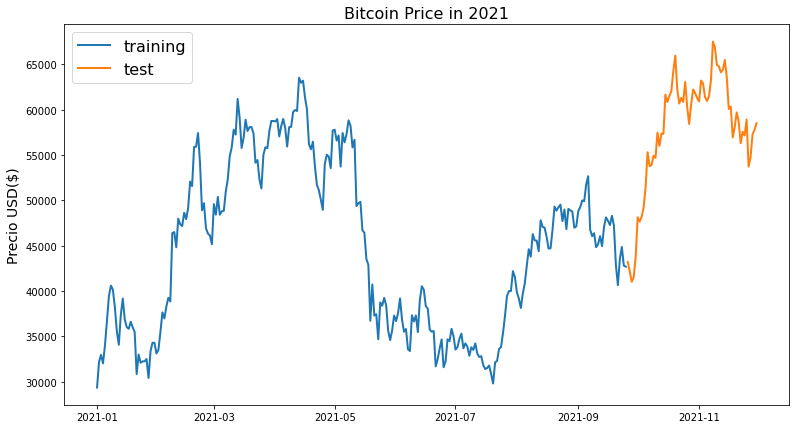

In [47]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Precio USD($)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

line_plot(train['Close'], test['Close'], 'training', 'test', title='Bitcoin Price in 2021')

In [48]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [49]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [50]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

train, test, X_train, X_test, y_train, y_test = prepare_data(
    top_10_2021[0], 'Close', window_len=5, zero_base=True, test_size=0.2)

In [57]:
def reshape_dataset(train_dataset):
    nsamples, nx, ny = train_dataset.shape
    d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
    return d2_train_dataset

X_train_2D = reshape_dataset(X_train)
X_test_2D = reshape_dataset(X_test)

In [115]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error


clf = svm.SVR()
clf.fit(X_train_2D, y_train)
clf_preds = clf.predict(X_test_2D).squeeze()
mean_absolute_error(clf_preds, y_test)

0.056746042737609144

In [116]:
targets = test['Close'][5:]
clf_preds = test['Close'].values[:-5] * (clf_preds + 1)
clf_preds = pd.Series(index=targets.index, data=clf_preds)
print(targets,clf_preds)


Date
2021-10-01    48146.0
2021-10-02    47666.9
2021-10-03    48200.1
2021-10-04    49227.3
2021-10-05    51469.3
               ...   
2021-11-26    53730.9
2021-11-27    54765.9
2021-11-28    57291.5
2021-11-29    57794.8
2021-11-30    58524.6
Name: Close, Length: 61, dtype: float64 Date
2021-10-01    43117.087463
2021-10-02    42184.622000
2021-10-03    41242.494354
2021-10-04    41854.216011
2021-10-05    44172.808479
                  ...     
2021-11-26    58651.468964
2021-11-27    56225.403462
2021-11-28    57481.876103
2021-11-29    56994.151522
2021-11-30    58899.989528
Length: 61, dtype: float64


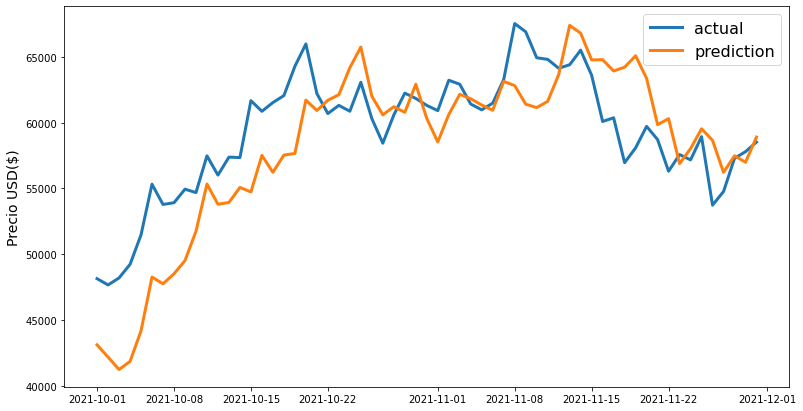

In [118]:
line_plot(targets, clf_preds, 'actual', 'prediction', lw=3)
